In [32]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 5e-06
end_value1 = 7e-04

# particle_diameter_1 = 1e-4
# particle_diameter_2 = 3e-7

start_value2 = 2e-7
end_value2 = 9e-7

column_header =['particle_diameter_1', 'particle_diameter_2']
interval_1 = (end_value1-start_value1)/20
print(interval_1)
error_K_1 = interval_1**2/150*(0.001)/(1-0.1)**2
print('error_K_1 =', error_K_1)
interval_2 = (end_value2-start_value2)/20
print(interval_2)  
error_K_2 = interval_2/1.75*0.001/(1-0.1)
print('error K_2 =', error_K_2)

array1 = np.linspace(start_value1, end_value1, 20) 
array2 = np.linspace(start_value2, end_value2, 20)

combinations = list(product(array1, array2))
 
# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)
 
# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



3.475e-05
error_K_1 = 9.93878600823045e-15
3.4999999999999996e-08
error K_2 = 2.222222222222222e-11
     particle_diameter_1  particle_diameter_2
0               0.000005         2.000000e-07
1               0.000005         2.368421e-07
2               0.000005         2.736842e-07
3               0.000005         3.105263e-07
4               0.000005         3.473684e-07
..                   ...                  ...
395             0.000700         7.526316e-07
396             0.000700         7.894737e-07
397             0.000700         8.263158e-07
398             0.000700         8.631579e-07
399             0.000700         9.000000e-07

[400 rows x 2 columns]


In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
md_df = md_df.drop(508)
md_df = md_df.drop(507)
md_df = md_df.drop(506)
md_df = md_df.drop(505)
md_df = md_df.drop(504)
md_df = md_df.drop(503)
md_df = md_df.drop(502)
md_df = md_df.drop(501)


# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0.0,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.1,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,6.098955,42.684431,-4109.383225,5.720554,5.720554,5.720554,5.720554
0.2,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.682559,5.680938,5.679367,5.707291,5.716526,5.706272,5.673511,5.672141,5.670804,5.669499
0.3,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.624638,5.620697,5.616886,5.652866,5.698808,5.648171,5.602748,5.599456,5.596250,5.593125
0.4,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.551233,5.544521,5.538041,5.579077,5.636937,5.569774,5.514120,5.508575,5.503184,5.497936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,5.496306,5.496029,5.495827,5.495672,5.495551,5.495452,5.495370,5.495302,5.495244,5.495194,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541
49.7,5.495540,5.495264,5.495061,5.494906,5.494784,5.494685,5.494603,5.494535,5.494477,5.494426,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541
49.8,5.494775,5.494497,5.494294,5.494139,5.494017,5.493918,5.493836,5.493768,5.493709,5.493659,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541
49.9,5.494009,5.493731,5.493528,5.493372,5.493250,5.493151,5.493069,5.493000,5.492942,5.492891,...,0.101543,0.101552,0.101551,0.101562,0.101573,0.101584,0.101568,0.101552,0.101568,0.101541


(0.0, 6.0)

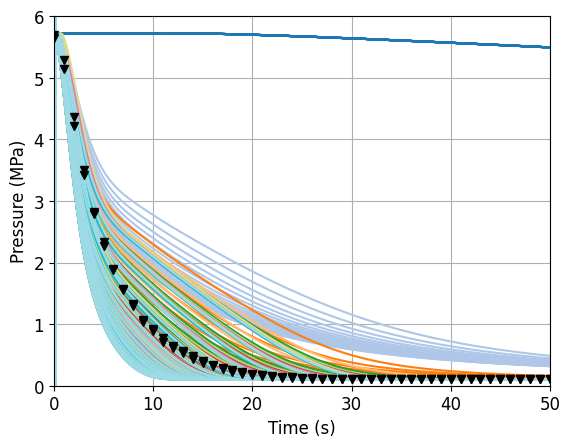

In [34]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT1_800_2']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_800_1']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 6)



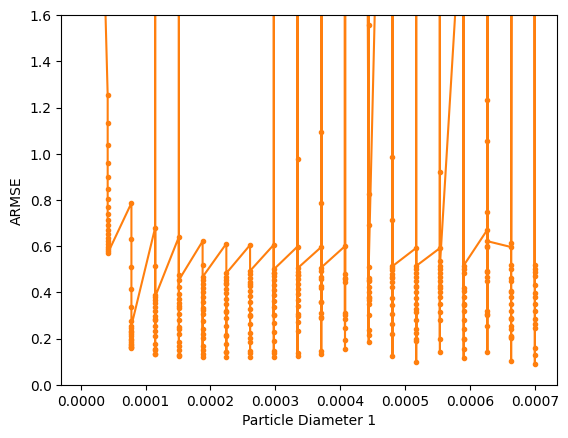

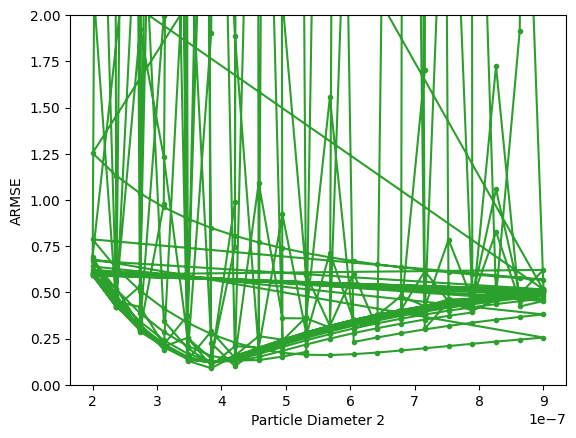

Minimum ARMSE: 0.08928152017247788
K_1 =  4.032921810699588e-12
K_2 =  2.439431913116124e-10
particle_diameter_1 =  0.0007
particle_diameter_2 =  3.842105263157895e-07


In [35]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_800_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.ylim(0, 1.6)
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.ylim(0, 2)
plt.show()


minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

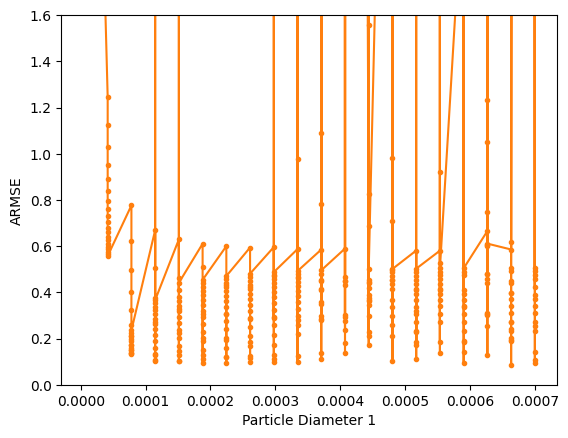

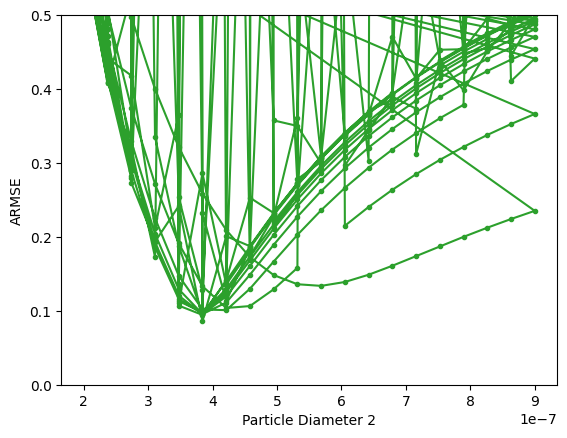

Minimum ARMSE: 0.08587268482877018
K_1 =  4.032921810699588e-12
K_2 =  2.439431913116124e-10
particle_diameter_1 =  0.0007
particle_diameter_2 =  3.842105263157895e-07


In [36]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_800_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.ylim(0, 1.6)
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.ylim(0, 0.5)
plt.show()


minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_2 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

(0.0, 6.0)

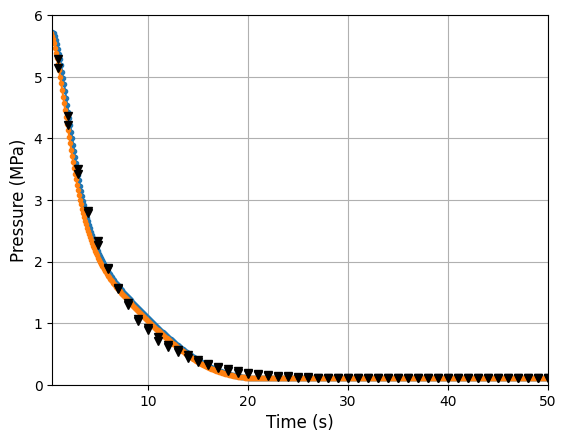

In [37]:
# Plot all pressure decays
md_df[min_index_1].plot(marker = '.')
md_df[min_index_2].plot(marker = '.')
plt.plot(data20['time'], data20['CT1_800_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_800_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0.4, 50)
plt.ylim(0, 6)
